# Trajectory Visualization (pdf version)

## Setup
- Specify path to configuration file
- Specify color column
- Specify class categories to include (to avoid overlaps)

In [1]:
configuration_file = "configs/alignedUMAP_configuration.yaml" # path to configuration file
colorname = 'Subtypes' # specify colorname column from metadata file
selected_cats = ['PD_h', 'HC'] # which categories to show (according to colorname column); leave blank if want to display all

## Create plot
- It will also save its pdf version in parameter_views_pdf directory.

In [2]:
import warnings
warnings.filterwarnings('ignore')
from omegaconf import OmegaConf
from utils.parameter_view import generate_color_map, save_as_pdf_allbox, return_generated_figure, get_legend_box, save_as_pdf_hbox, generate_dataset
import os
from PIL import Image
from tqdm import tqdm
from itertools import product
from pathlib import Path
import pandas as pd
import pickle
import sys

config = OmegaConf.load(configuration_file)
input_dataset_name = config['dataset_name'].split('.csv')[0]
input_visualization_method = "umap_aligned"
num_cores = config['num_cores']
result_dir = Path(config['result_dir'])
if num_cores == -1:
    num_cores = os.cpu_count()
sample_fraction = config['sample_fraction']
sample_fraction = str(float(sample_fraction)) if not sample_fraction == 1 else "1.0"
sample_text = f"_{sample_fraction}"
fpath = result_dir / f"{input_dataset_name}/{input_visualization_method}/generated_data/{input_dataset_name}_{num_cores}{sample_text}.pickle"


all_figs = []
row_titles = []
all_legends = []
eye_view = [1.25, -1.25, -1.25]
with open(fpath, 'rb') as handle:
    results_data = pickle.load(handle)

for value in tqdm(list(results_data['complete_dataframe']['input_parameter_id'].unique())[:8]):
    mapping_legend = {}
    num_subjects = 1
    alpha = 1
    fig, (color_maps, nocolor_maps) = generate_dataset(results_data, input_dataset_name,  value, eye_view , num_subjects, selected_cats, colorname, scale=1, alpha=alpha, transparency_effect=True)
    all_figs.append(fig)
    all_legends.append(Image.open(get_legend_box(nocolor_maps, selected_cats, scale=1, mapping_legend=mapping_legend)))
    title = f"{':'.join([k.split('=')[-1] for k in value.split(';')])}"
    row_titles.append(title)

_ = save_as_pdf_allbox(all_figs, row_titles, f'parameter_views_pdf/{input_dataset_name}_parameters.pdf', ncols=4, scale=1, all_legends=all_legends)
_ = save_as_pdf_allbox(all_figs, row_titles, f'parameter_views_pdf/{input_dataset_name}_parameters_nolegend.pdf', ncols=4, scale=1, all_legends=None)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:24<00:00,  3.02s/it]


## View plot

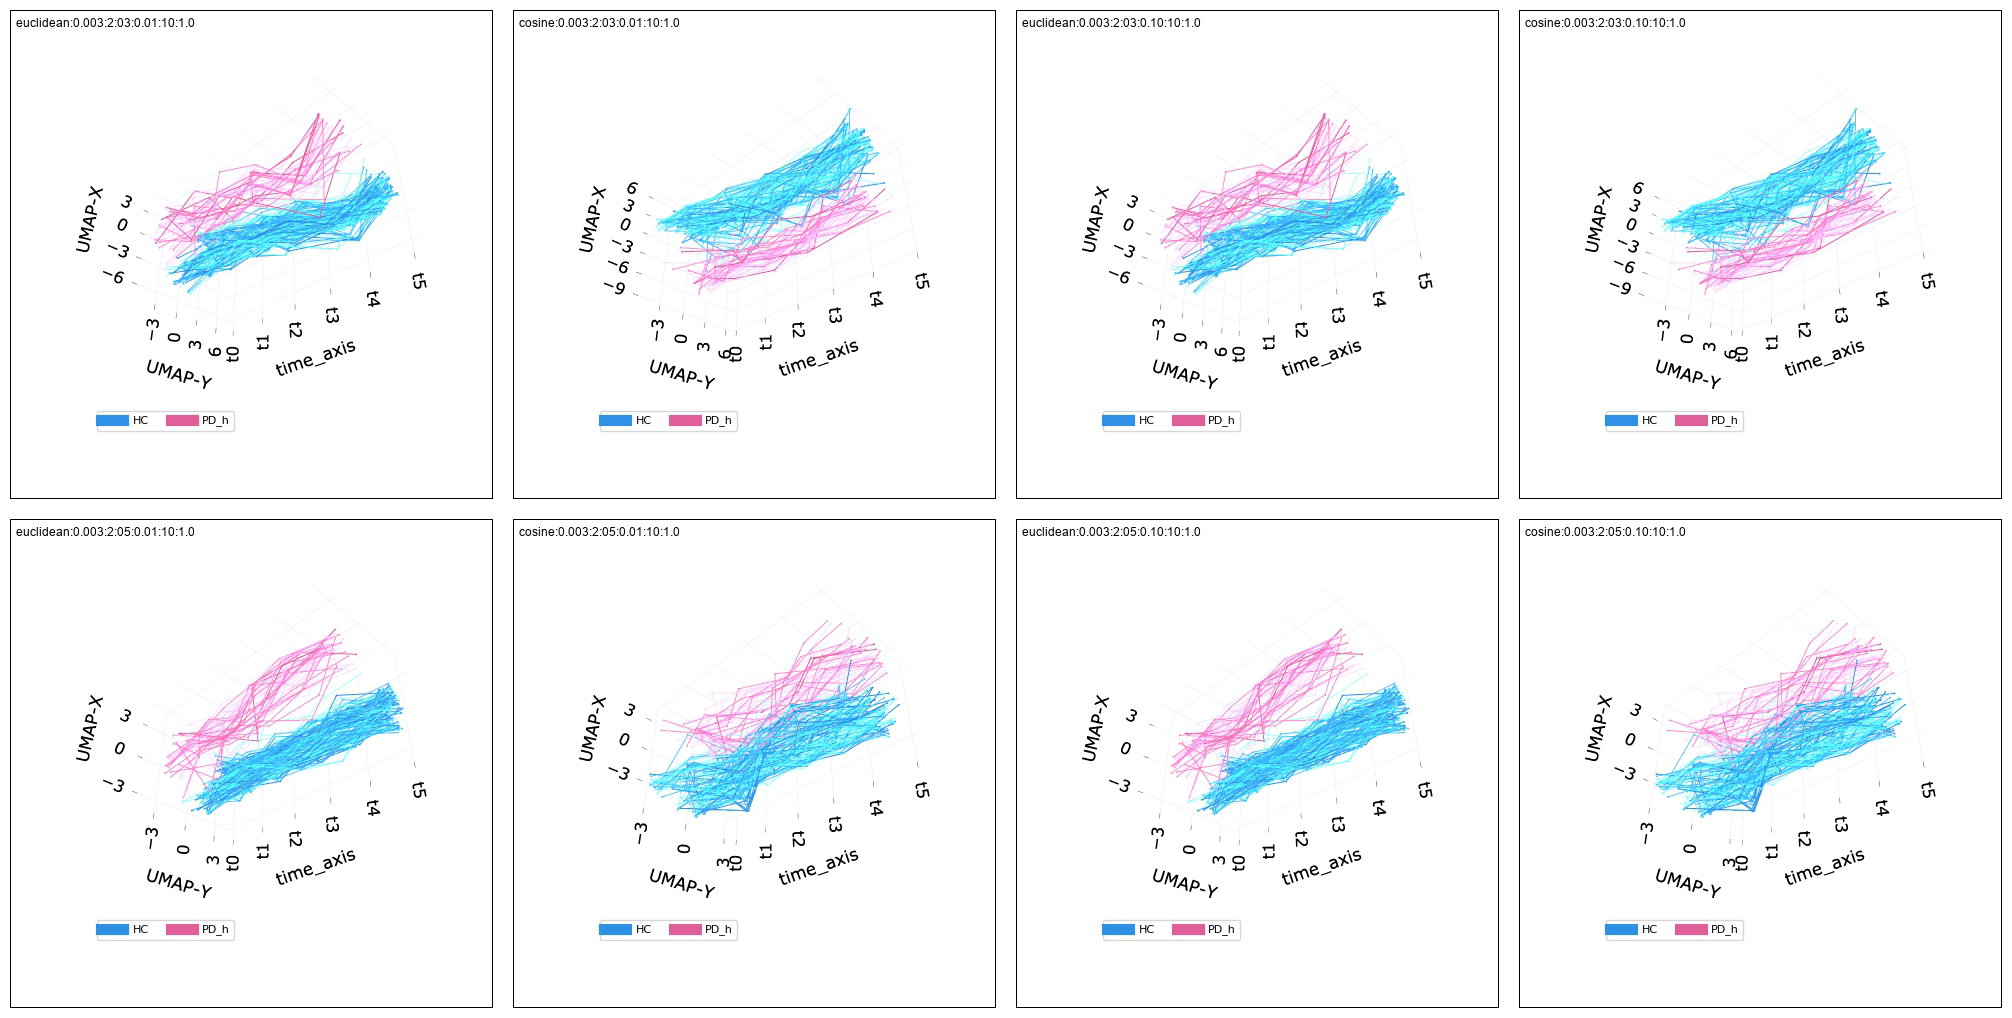

In [3]:
from wand.image import Image as WImage
img = WImage(filename=f'parameter_views_pdf/{input_dataset_name}_parameters.pdf')
img